# Capstone Project: The Efficacy of Multilayer Perceptron Algorithms in Predicting Bankruptcy, The Models

## Table of Contents

<ul>
<li><a href="#DISCLOSURE">DISCLOSURE</a></li>
<li><a href="#introduction">INTRODUCTION</a></li>
<li><a href="#Benchmark Logistic Regression">Benchmark Logistic Regression</a></li>
<li><a href="#MLP Model">MLP Model</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='DISCLOSURE'></a>
## DISCLOSURE
Please note, that this notebook, "bankruptcy-model.ipynb" ONLY COVERS the modeling of the data. Simply, the jupyter notebook, "bankruptcy-data.ipynb" was too big to include the models.

<a id='introduction'></a>
## INTRODUCTION
This part of the analyis loads the preprocessed data: a dataset with no null values ("No Nulls"), a dataset with imputed null values ("Nulls Only'), a dataset that has a dummy variable for each feature variable that signals whether a value in the feature column is null ("One Hot"), and a dataset with imputed null values and a variable that counts the number of null values in a given row of data ("Sum"). Logistic regression models are applied to these four datasets as the benchmark models. Next, Multi Layer Perceptron (MLP) models are made for the four datasets. The AUC scores are calculated for all the models. The conclusion compares the AUC scores of the MLP models to the Logistic Regression models, and offers additional insight into these models.

<a id='Benchmark Logistic Regression'></a>
## Benchmark Logistic Regression
Logistic regression servers as a good benchmark model for predicting bankruptcies. It's a basic model that analyzes a binary target variable (bankrupt vs not bankrupt).

In [1]:
# This imports the necessary libraries for the logistic regression models.
from sklearn.linear_model import LogisticRegression

# This imports the AUC score for scoring the models.
# This comes from Reference 27 in References.
from sklearn.metrics import roc_auc_score

# These are libraries that will be needed to organize data,
# graph data, and change the working directory.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


### Load Data: No Nulls

In [2]:
# This loads the no_nulls X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_nonulls = pd.read_csv('no-peaking/Xtrain_nonulls.csv')
Xtrain_nonulls = np.array(Xtrain_nonulls)
Xtest_nonulls = pd.read_csv('no-peaking/Xtest_nonulls.csv')
Xtest_nonulls = np.array(Xtest_nonulls)

# This loads the no_nulls Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_nonulls = pd.read_csv('no-peaking/Ytrain_nonulls.csv')
Ytrain_nonulls = np.array(Ytrain_nonulls)
Ytrain_nonulls = Ytrain_nonulls.ravel() 
Ytest_nonulls = pd.read_csv('no-peaking/Ytest_nonulls.csv')
Ytest_nonulls = np.array(Ytest_nonulls)
Ytest_nonulls = Ytest_nonulls.ravel()

### Performing Hold-out Cross-Validation on just the training set
K-fold Cross-Validation is a standard method for preventing a logistic regression model from overfitting. However, because the testing set, the fifth year of the dataset, is arbitrarily chosen (not random), K-fold Cross-Validation cannot be applied to the dataset (Reference 3). K-fold Cross-Validation would corrupt the testing set with data leakage considering that the dataset is a time-series set (Reference 3). To prevent data leakage, Hold-out cross-Validation will only be applied to the training set (References 3 & 4). Hold-out Cross-Validation takes a percentage of the training set as a validation set to test the accuracy of the model during the training stage. This method of cross validation, like all methods, is used to prevent the overfitting of a model and poor accuracy performance when applying the testing data to the fitted model (Reference 3).

### No Nulls Logistic Regression Benchmark

In [3]:
# This import train_test_split from sklearn.
from sklearn.model_selection import train_test_split

In [4]:
# This creates the hold-out validation set for the logistic regression model
# for the No Nulls dataset.
# This comes from Reference 4 in References.
Xtrain_nonulls, Xval_nonulls, Ytrain_nonulls, Yval_nonulls = train_test_split(
                    Xtrain_nonulls, Ytrain_nonulls, test_size = 0.2, random_state = 13)

In [5]:
# This creates the logistic regression model for the No Nulls Dataset.
log_nonulls = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the log_nonulls model with the training data.
log_nonulls.fit(Xtrain_nonulls,Ytrain_nonulls)

# This predicts the y values from the Xval dataset.
yval_pred_nonulls = log_nonulls.predict(Xval_nonulls)

# This returns the validation AUC score.
VAL_auc_nonulls = roc_auc_score(Yval_nonulls, yval_pred_nonulls)
VAL_auc_nonulls

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8493093121316346

In [6]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_nonulls = log_nonulls.predict(Xtest_nonulls)
TEST_auc_nonulls = roc_auc_score(Ytest_nonulls, ytest_pred_nonulls)
print("The AUC score for the model is %.4f." % TEST_auc_nonulls)

The AUC score for the model is 0.3675.


### Load Data: Nulls only

In [7]:
# This loads the Nulls only training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_nullsonly = pd.read_csv('no-peaking/Xtrain_sum.csv')
Xtrain_nullsonly = Xtrain_nullsonly.drop(
    Xtrain_nullsonly.columns[64], axis=1)
Xtrain_nullsonly = np.array(Xtrain_nullsonly)
Xtest_nullsonly = pd.read_csv('no-peaking/Xtest_sum.csv')
Xtest_nullsonly = Xtest_nullsonly.drop(
    Xtest_nullsonly.columns[64], axis=1)
Xtest_nullsonly = np.array(Xtest_nullsonly)

# This loads the Nulls only Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_nullsonly = pd.read_csv('no-peaking/Ytrain_sum.csv')
Ytrain_nullsonly = np.array(Ytrain_nullsonly)
Ytrain_nullsonly = Ytrain_nullsonly.ravel() 
Ytest_nullsonly = pd.read_csv('no-peaking/Ytest_sum.csv')
Ytest_nullsonly = np.array(Ytest_nullsonly)
Ytest_nullsonly = Ytest_nullsonly.ravel()

### Nulls Only Logistic Regression Benchmark

In [8]:
# This creates the hold-out validation set for the logistic regression model
# for the Nulls Only dataset.
# This comes from Reference 4 in References.
Xtrain_nullsonly, Xval_nullsonly, Ytrain_nullsonly, Yval_nullsonly = train_test_split(
                    Xtrain_nullsonly, Ytrain_nullsonly, test_size = 0.2, random_state = 13)

In [9]:
# This creates the logistic regression model for the Nulls Only Dataset.
log_nullsonly = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the Log_nullsonly model with the training data.
log_nullsonly.fit(Xtrain_nullsonly,Ytrain_nullsonly)

# This predicts the y values from the Xval dataset.
yval_pred_nullsonly = log_nullsonly.predict(Xval_nullsonly)

# This returns the validation AUC score.
VAL_auc_nullsonly = roc_auc_score(Yval_nullsonly, yval_pred_nullsonly)
VAL_auc_nullsonly

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7335101563282769

In [10]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_nullsonly = log_nullsonly.predict(Xtest_nullsonly)
TEST_auc_nullsonly = roc_auc_score(Ytest_nullsonly, ytest_pred_nullsonly)
print("The AUC score for the model is %.4f." % TEST_auc_nullsonly)

The AUC score for the model is 0.6903.


### Load Data: Onehot

In [11]:
# This loads the one hot X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_onehot = pd.read_csv('no-peaking/Xtrain_onehot.csv')
Xtrain_onehot = np.array(Xtrain_onehot)
Xtest_onehot = pd.read_csv('no-peaking/Xtest_onehot.csv')
Xtest_onehot = np.array(Xtest_onehot)

# This loads the one hot Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_onehot = pd.read_csv('no-peaking/Ytrain_onehot.csv')
Ytrain_onehot = np.array(Ytrain_onehot)
Ytrain_onehot = Ytrain_onehot.ravel() 
Ytest_onehot = pd.read_csv('no-peaking/Ytest_onehot.csv')
Ytest_onehot = np.array(Ytest_onehot)
Ytest_onehot = Ytest_onehot.ravel()

### One Hot Logistic Regression Benchmark

In [12]:
# This creates the hold-out validation set for the logistic regression model
# for the One Hot dataset.
# This comes from Reference 4 in References.
Xtrain_onehot, Xval_onehot, Ytrain_onehot, Yval_onehot = train_test_split(
                    Xtrain_onehot, Ytrain_onehot, test_size = 0.2, random_state = 13)

In [13]:
# This creates the logistic regression model for the One Hot Dataset.
log_onehot = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the log_onehot model with the training data.
log_onehot.fit(Xtrain_onehot,Ytrain_onehot)

# This predicts the y values from the Xval dataset.
yval_pred_onehot = log_onehot.predict(Xval_onehot)

# This returns the validation AUC score.
VAL_auc_onehot = roc_auc_score(Yval_onehot, yval_pred_onehot)
VAL_auc_onehot

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.866889447207181

In [14]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_onehot = log_onehot.predict(Xtest_onehot)
TEST_auc_onehot = roc_auc_score(Ytest_onehot, ytest_pred_onehot)
print("The AUC score for the model is %.4f." % TEST_auc_onehot)

The AUC score for the model is 0.6872.


### Load Data: Sum

In [15]:
# This loads the SUM X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_sum = pd.read_csv('no-peaking/Xtrain_sum.csv')
Xtrain_sum = np.array(Xtrain_sum)
Xtest_sum = pd.read_csv('no-peaking/Xtest_sum.csv')
Xtest_sum = np.array(Xtest_sum)

# This loads the SUM Y training and tesing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_sum = pd.read_csv('no-peaking/Ytrain_sum.csv')
Ytrain_sum = np.array(Ytrain_sum)
Ytrain_sum = Ytrain_sum.ravel() 
Ytest_sum = pd.read_csv('no-peaking/Ytest_sum.csv')
Ytest_sum = np.array(Ytest_sum)
Ytest_sum = Ytest_sum.ravel()

### Sum Logistic Regression Benchmark

In [16]:
# This creates the hold-out validation set for the logistic regression model
# for the Sum dataset.
# This comes from Reference 4 in References.
Xtrain_sum, Xval_sum, Ytrain_sum, Yval_sum = train_test_split(
                    Xtrain_sum, Ytrain_sum, test_size = 0.2, random_state = 13)

In [17]:
# This creates the logistic regression model for the Sum Dataset.
log_sum = LogisticRegression(penalty='l2', max_iter=1000)

# This fits the log_sun model with the training data.
log_sum.fit(Xtrain_sum,Ytrain_sum)

# This predicts the y values from the Xval dataset.c
yval_pred_sum = log_sum.predict(Xval_sum)

# This returns the validation AUC score.
VAL_auc_sum = roc_auc_score(Yval_sum, yval_pred_sum)
VAL_auc_sum

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7454176998689093

In [18]:
# This tests the model, built on the training data, with the
# testing data from year 5.
ytest_pred_sum = log_sum.predict(Xtest_sum)
TEST_auc_sum = roc_auc_score(Ytest_sum, ytest_pred_sum)
print("The AUC score for the model is %.4f." % TEST_auc_sum)

The AUC score for the model is 0.6822.


<a id='MLP Model'></a>
## MLP Model

## MLP Model No Nulls

In [19]:
# This creates a directory to save the best models for the MLP.
# This comes from Reference 13 in References.
import os
if not os.path.exists('saved_models'):
    os.mkdir('saved_models')
else:
    print("Directory already exists.")

Directory already exists.


In [20]:
# This imports the necessary libraries for the MLP.

# This imports the sequential model, the layers,
# the SGD optimizer, the regularizers from keras.
# This comes from Reference 5 in Referenes.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Nadam
from keras import regularizers

# This imports checkpointer, which records the best weights
# for the algorithm.
# This comes from Reference 6 in References.
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [21]:
def build_model(drop_rate, l2_factor, first_dense, second_dense,
                third_dense, hidden_act, out_act, x):
    dim_int = int(np.size(x,1))
    # This defines the model as a sequential model.
    # This comes from References 1 in References.
    model = Sequential()

    # This is the input layer.
    # This comes from References 1 & 3 in References.
    model.add(Dense(first_dense, activation = hidden_act,
        kernel_regularizer = regularizers.l2(l2_factor),
        input_dim = dim_int))
    model.add(Dropout(drop_rate))

    # This creates the first hidden layer.
    # This comes from Reference 7 in References.
    model.add(Dense(second_dense,
        activation = hidden_act,
        kernel_regularizer = regularizers.l2(l2_factor)))
    model.add(Dropout(drop_rate))
    
    # This creates the second hidden layer.
    # This comes from Reference 7 in References.
    model.add(Dense(third_dense,
        activation = hidden_act,
        kernel_regularizer = regularizers.l2(l2_factor)))
    model.add(Dropout(drop_rate))

    # This creates the output layer.
    # This comes from Reference 7 in References.
    model.add(Dense(1, activation=out_act))
    # This returns the model.
    return model

### MLP NO Nulls, default learning rate in Stochastic Loss Optimizer
This is a comparison MLP model that uses the default learning rate of 0.01 to descend down the loss gradient in an attempt to find the global minimum (Reference 14).

In [162]:
# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
DEFAULT_stochastic = SGD()
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for No NULLS.
mlp_nonulls_DEFAULT = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_nonulls)

In [163]:
# This compiles the MLP model for the No Nulls data.
# This comes from Reference 13 in References.
mlp_nonulls_DEFAULT.compile(loss='binary_crossentropy',
              optimizer= DEFAULT_stochastic,
              metrics=['accuracy'])

In [164]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5',
                             verbose=1, save_best_only=True)

In [165]:
# This fits the model and runs it for 100 epochs.
mlp_nonulls_DEFAULT.fit(Xtrain_nonulls, Ytrain_nonulls, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 12592 samples, validate on 3148 samples
Epoch 1/75
12592/12592 [==============================] - 3s 248us/step - loss: 0.8101 - acc: 0.5098 - val_loss: 0.7591 - val_acc: 0.5743

Epoch 00001: val_loss improved from inf to 0.75911, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 2/75
12592/12592 [==============================] - 1s 69us/step - loss: 0.7705 - acc: 0.5314 - val_loss: 0.7473 - val_acc: 0.6836

Epoch 00002: val_loss improved from 0.75911 to 0.74732, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 3/75
12592/12592 [==============================] - 1s 78us/step - loss: 0.7572 - acc: 0.5441 - val_loss: 0.7323 - val_acc: 0.7456

Epoch 00003: val_loss improved from 0.74732 to 0.73229, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 4/75
12592/12592 [==============================] - 1s 70us/step - loss: 0.7433 - acc: 0.5570 - val_loss: 0.7154 - val_acc: 0.7678

Epoch 00004: val_loss improved fr

12592/12592 [==============================] - 1s 66us/step - loss: 0.4943 - acc: 0.7888 - val_loss: 0.3956 - val_acc: 0.8621

Epoch 00032: val_loss improved from 0.39930 to 0.39560, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 33/75
12592/12592 [==============================] - 1s 67us/step - loss: 0.4873 - acc: 0.7957 - val_loss: 0.3924 - val_acc: 0.8602

Epoch 00033: val_loss improved from 0.39560 to 0.39245, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 34/75
12592/12592 [==============================] - 1s 72us/step - loss: 0.4857 - acc: 0.8008 - val_loss: 0.3925 - val_acc: 0.8567

Epoch 00034: val_loss did not improve from 0.39245
Epoch 35/75
12592/12592 [==============================] - 1s 70us/step - loss: 0.4784 - acc: 0.8065 - val_loss: 0.3870 - val_acc: 0.8669

Epoch 00035: val_loss improved from 0.39245 to 0.38702, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 36/75
12592/12592 [===========

12592/12592 [==============================] - 1s 76us/step - loss: 0.3987 - acc: 0.8450 - val_loss: 0.3238 - val_acc: 0.8907

Epoch 00065: val_loss did not improve from 0.32200
Epoch 66/75
12592/12592 [==============================] - 1s 79us/step - loss: 0.3967 - acc: 0.8486 - val_loss: 0.3194 - val_acc: 0.8929

Epoch 00066: val_loss improved from 0.32200 to 0.31942, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 67/75
12592/12592 [==============================] - 1s 76us/step - loss: 0.3941 - acc: 0.8517 - val_loss: 0.3203 - val_acc: 0.8920

Epoch 00067: val_loss did not improve from 0.31942
Epoch 68/75
12592/12592 [==============================] - 1s 79us/step - loss: 0.3924 - acc: 0.8528 - val_loss: 0.3157 - val_acc: 0.8990

Epoch 00068: val_loss improved from 0.31942 to 0.31573, saving model to saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5
Epoch 69/75
12592/12592 [==============================] - 1s 79us/step - loss: 0.3919 - acc: 0.8547 - val_l

In [166]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_nonulls_DEFAULT.load_weights('saved_models/weights.best.mlp_nonulls_DEFAULT.hdf5')

In [167]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_nonulls_DEFAULT.evaluate(Xtest_nonulls, Ytest_nonulls, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 96.6277%


In [168]:
# This prints the AUC score for the model.
Ypred_nonulls_DEFAULT = mlp_nonulls_DEFAULT.predict(Xtest_nonulls)
mlp_nonulls_ROC_DEFAULT = roc_auc_score(Ytest_nonulls, Ypred_nonulls_DEFAULT)
print("The AUC score for the model is %.4f." % mlp_nonulls_ROC_DEFAULT)

The AUC score for the model is 0.5000.


In [169]:
# This imports the necessary library for the ROC Curve.
from sklearn import metrics

def roc_plot(model, x_test, y_test, title):
    '''
    This function plots ROC curves. It takes in
    the model, title, x_test, y_test as arguments.
    '''
    # This sets the size of the plot
    # This comes from Reference 12 in References
    plt.figure(figsize=(6.0,6.0))
    
    # This finds the predicted values of y from the x_test
    # data.
    # This comes from Reference 11 in References.
    pred_probs = model.predict_proba(x_test)
    
    # This finds the false and true positive rates for
    # the ROC Curve.
    # This comes from Reference 11 in References.
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_probs)
    
    # This finds the AUC score.
    # This comes from Reference 11 in References.
    auc = metrics.roc_auc_score(y_test, pred_probs)
    auc = str(auc)
    auc = auc[0:6]
    
    # This plots the ROC Curve with the AUC label.
    plt.plot(fpr,tpr,label='auc: ' + auc)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

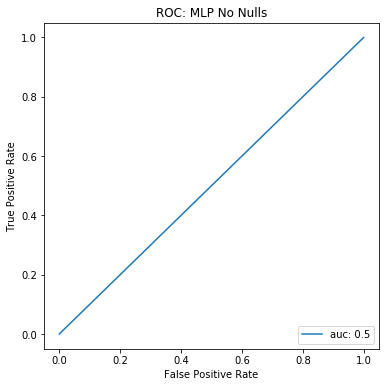

In [170]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_nonulls_DEFAULT, x_test=Xtest_nonulls,
        y_test=Ytest_nonulls,title="ROC: MLP No Nulls")

## MLP Model No Nulls Final
This model is the final MLP No Nulls Model.

In [171]:
# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for No NULLS.
mlp_nonulls = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_nonulls)

In [172]:
# This compiles the MLP model for the No Nulls data.
# This comes from Reference 13 in References.
mlp_nonulls.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [173]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_nonulls.hdf5',
                             verbose=1, save_best_only=True)

In [174]:
# This fits the model and runs it for 100 epochs.
mlp_nonulls.fit(Xtrain_nonulls, Ytrain_nonulls, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 12592 samples, validate on 3148 samples
Epoch 1/75
12592/12592 [==============================] - 3s 267us/step - loss: 0.8004 - acc: 0.5268 - val_loss: 0.7558 - val_acc: 0.5915

Epoch 00001: val_loss improved from inf to 0.75576, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 2/75
12592/12592 [==============================] - 1s 81us/step - loss: 0.7943 - acc: 0.5328 - val_loss: 0.7526 - val_acc: 0.6064

Epoch 00002: val_loss improved from 0.75576 to 0.75262, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 3/75
12592/12592 [==============================] - 1s 90us/step - loss: 0.7837 - acc: 0.5361 - val_loss: 0.7505 - val_acc: 0.6172

Epoch 00003: val_loss improved from 0.75262 to 0.75054, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 4/75
12592/12592 [==============================] - 1s 96us/step - loss: 0.7823 - acc: 0.5417 - val_loss: 0.7489 - val_acc: 0.6223

Epoch 00004: val_loss improved from 0.75054 to 0.74894, s

Epoch 33/75
12592/12592 [==============================] - 1s 93us/step - loss: 0.7296 - acc: 0.6105 - val_loss: 0.7045 - val_acc: 0.7316

Epoch 00033: val_loss improved from 0.70619 to 0.70451, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 34/75
12592/12592 [==============================] - 1s 85us/step - loss: 0.7258 - acc: 0.6139 - val_loss: 0.7027 - val_acc: 0.7360

Epoch 00034: val_loss improved from 0.70451 to 0.70272, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 35/75
12592/12592 [==============================] - 1s 90us/step - loss: 0.7259 - acc: 0.6207 - val_loss: 0.7008 - val_acc: 0.7370

Epoch 00035: val_loss improved from 0.70272 to 0.70080, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 36/75
12592/12592 [==============================] - 1s 84us/step - loss: 0.7232 - acc: 0.6201 - val_loss: 0.6987 - val_acc: 0.7386

Epoch 00036: val_loss improved from 0.70080 to 0.69873, saving model to saved_models/weights.best.m

12592/12592 [==============================] - 1s 88us/step - loss: 0.6858 - acc: 0.6597 - val_loss: 0.6394 - val_acc: 0.7576

Epoch 00065: val_loss improved from 0.64111 to 0.63944, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 66/75
12592/12592 [==============================] - 1s 85us/step - loss: 0.6820 - acc: 0.6626 - val_loss: 0.6378 - val_acc: 0.7583

Epoch 00066: val_loss improved from 0.63944 to 0.63777, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 67/75
12592/12592 [==============================] - 1s 84us/step - loss: 0.6816 - acc: 0.6652 - val_loss: 0.6359 - val_acc: 0.7586

Epoch 00067: val_loss improved from 0.63777 to 0.63589, saving model to saved_models/weights.best.mlp_nonulls.hdf5
Epoch 68/75
12592/12592 [==============================] - 1s 86us/step - loss: 0.6816 - acc: 0.6673 - val_loss: 0.6341 - val_acc: 0.7595

Epoch 00068: val_loss improved from 0.63589 to 0.63411, saving model to saved_models/weights.best.mlp_nonulls.h

In [175]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_nonulls.load_weights('saved_models/weights.best.mlp_nonulls.hdf5')

In [176]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_nonulls.evaluate(Xtest_nonulls, Ytest_nonulls, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 87.8464%


In [177]:
# This prints the AUC score for the model.
Ypred_nonulls = mlp_nonulls.predict(Xtest_nonulls)
mlp_nonulls_ROC = roc_auc_score(Ytest_nonulls, Ypred_nonulls)
print("The AUC score for the model is %.4f." % mlp_nonulls_ROC)

The AUC score for the model is 0.5890.


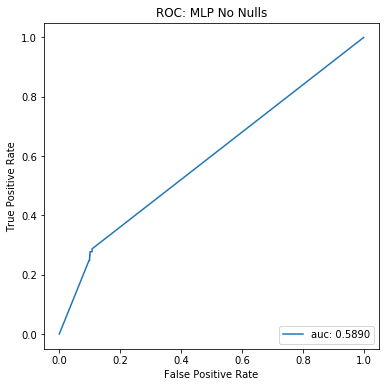

In [178]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_nonulls, x_test=Xtest_nonulls,
        y_test=Ytest_nonulls,title="ROC: MLP No Nulls")

### MLP Model Nulls Only

### MLP Model Nulls Only, default learning rate in Stochastic Gradient Loss Optimizer
This is a comparison MLP model that uses the default learning rate of 0.01 to descend down the loss gradient in an attempt to find the global minimum (Reference 14).

In [179]:


# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
DEFAULT_stochastic = SGD()
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for Nulls Only.
mlp_nullsonly_DEFAULT = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_nullsonly)

In [180]:
# This compiles the MLP model for the Nulls Only data.
# This comes from Reference 13 in References.
mlp_nullsonly_DEFAULT.compile(loss='binary_crossentropy',
              optimizer= DEFAULT_stochastic,
              metrics=['accuracy'])

In [181]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5',
                             verbose=1, save_best_only=True)

In [182]:
# This fits the model and runs it for 100 epochs.
mlp_nullsonly_DEFAULT.fit(Xtrain_nullsonly, Ytrain_nullsonly, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 52409 samples, validate on 13103 samples
Epoch 1/75
52409/52409 [==============================] - 7s 125us/step - loss: 0.7574 - acc: 0.5874 - val_loss: 0.6973 - val_acc: 0.6956

Epoch 00001: val_loss improved from inf to 0.69728, saving model to saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5
Epoch 2/75
52409/52409 [==============================] - 4s 73us/step - loss: 0.7235 - acc: 0.6290 - val_loss: 0.6755 - val_acc: 0.6985

Epoch 00002: val_loss improved from 0.69728 to 0.67552, saving model to saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5
Epoch 3/75
52409/52409 [==============================] - 4s 72us/step - loss: 0.7099 - acc: 0.6392 - val_loss: 0.6660 - val_acc: 0.7005

Epoch 00003: val_loss improved from 0.67552 to 0.66599, saving model to saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5
Epoch 4/75
52409/52409 [==============================] - 4s 72us/step - loss: 0.7008 - acc: 0.6480 - val_loss: 0.6544 - val_acc: 0.7028

Epoch 00004: val_loss impr

52409/52409 [==============================] - 4s 82us/step - loss: 0.5855 - acc: 0.7297 - val_loss: 0.5329 - val_acc: 0.7694

Epoch 00033: val_loss did not improve from 0.53277
Epoch 34/75
52409/52409 [==============================] - 4s 76us/step - loss: 0.5841 - acc: 0.7285 - val_loss: 0.5288 - val_acc: 0.7838

Epoch 00034: val_loss improved from 0.53277 to 0.52880, saving model to saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5
Epoch 35/75
52409/52409 [==============================] - 4s 76us/step - loss: 0.5797 - acc: 0.7320 - val_loss: 0.5217 - val_acc: 0.7804

Epoch 00035: val_loss improved from 0.52880 to 0.52166, saving model to saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5
Epoch 36/75
52409/52409 [==============================] - 4s 77us/step - loss: 0.5815 - acc: 0.7327 - val_loss: 0.5309 - val_acc: 0.7853

Epoch 00036: val_loss did not improve from 0.52166
Epoch 37/75
52409/52409 [==============================] - 4s 77us/step - loss: 0.5815 - acc: 0.7325 - v

52409/52409 [==============================] - 4s 77us/step - loss: 0.5505 - acc: 0.7570 - val_loss: 0.4904 - val_acc: 0.8100

Epoch 00071: val_loss did not improve from 0.47170
Epoch 72/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.5479 - acc: 0.7579 - val_loss: 0.5192 - val_acc: 0.7655

Epoch 00072: val_loss did not improve from 0.47170
Epoch 73/75
52409/52409 [==============================] - 4s 82us/step - loss: 0.5473 - acc: 0.7601 - val_loss: 0.4904 - val_acc: 0.8005

Epoch 00073: val_loss did not improve from 0.47170
Epoch 74/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.5463 - acc: 0.7627 - val_loss: 0.4913 - val_acc: 0.7978

Epoch 00074: val_loss did not improve from 0.47170
Epoch 75/75
52409/52409 [==============================] - 4s 82us/step - loss: 0.5526 - acc: 0.7563 - val_loss: 0.4853 - val_acc: 0.8112

Epoch 00075: val_loss did not improve from 0.47170


In [183]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_nullsonly_DEFAULT.load_weights('saved_models/weights.best.mlp_nullsonly_DEFAULT.hdf5')

In [184]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_nullsonly_DEFAULT.evaluate(Xtest_nullsonly, Ytest_nullsonly, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 89.7496%


In [185]:
# This prints the AUC score for the model.
Ypred_nullsonly_DEFAULT= mlp_nullsonly_DEFAULT.predict(Xtest_nullsonly)
mlp_nullsonly_ROC_DEFAULT = roc_auc_score(Ytest_nullsonly, Ypred_nullsonly_DEFAULT)
print("The AUC score for the model is %.4f." % mlp_nullsonly_ROC_DEFAULT)

The AUC score for the model is 0.3151.


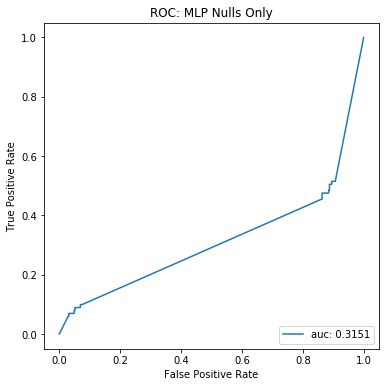

In [186]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_nullsonly_DEFAULT, x_test=Xtest_nullsonly,
        y_test=Ytest_nullsonly,title="ROC: MLP Nulls Only")

### Model Nulls Only Final Model
This is the only model in which the the higher learning rate resulted in a higher AUC score.

In [187]:


# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for Nulls Only.
mlp_nullsonly = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_nullsonly)

In [188]:
# This compiles the MLP model for the Nulls Only data.
# This comes from Reference 13 in References.
mlp_nullsonly.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [189]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_nullsonly.hdf5',
                             verbose=1, save_best_only=True)

In [190]:
# This fits the model and runs it for 100 epochs.
mlp_nullsonly.fit(Xtrain_nullsonly, Ytrain_nullsonly, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 52409 samples, validate on 13103 samples
Epoch 1/75
52409/52409 [==============================] - 6s 116us/step - loss: 0.7809 - acc: 0.5059 - val_loss: 0.7655 - val_acc: 0.6433

Epoch 00001: val_loss improved from inf to 0.76545, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 2/75
52409/52409 [==============================] - 4s 71us/step - loss: 0.7717 - acc: 0.5361 - val_loss: 0.7609 - val_acc: 0.6576

Epoch 00002: val_loss improved from 0.76545 to 0.76087, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 3/75
52409/52409 [==============================] - 4s 73us/step - loss: 0.7646 - acc: 0.5596 - val_loss: 0.7559 - val_acc: 0.6695

Epoch 00003: val_loss improved from 0.76087 to 0.75586, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 4/75
52409/52409 [==============================] - 4s 70us/step - loss: 0.7605 - acc: 0.5823 - val_loss: 0.7504 - val_acc: 0.6786

Epoch 00004: val_loss improved from 0.75586 to 0.7

52409/52409 [==============================] - 4s 79us/step - loss: 0.7055 - acc: 0.6464 - val_loss: 0.6693 - val_acc: 0.6952

Epoch 00033: val_loss improved from 0.67073 to 0.66934, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 34/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.7047 - acc: 0.6487 - val_loss: 0.6684 - val_acc: 0.6956

Epoch 00034: val_loss improved from 0.66934 to 0.66839, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 35/75
52409/52409 [==============================] - 4s 81us/step - loss: 0.7024 - acc: 0.6483 - val_loss: 0.6674 - val_acc: 0.6956

Epoch 00035: val_loss improved from 0.66839 to 0.66741, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 36/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.7012 - acc: 0.6502 - val_loss: 0.6663 - val_acc: 0.6959

Epoch 00036: val_loss improved from 0.66741 to 0.66633, saving model to saved_models/weights.best.mlp_nul

52409/52409 [==============================] - 4s 79us/step - loss: 0.6813 - acc: 0.6650 - val_loss: 0.6415 - val_acc: 0.7003

Epoch 00065: val_loss improved from 0.64218 to 0.64145, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 66/75
52409/52409 [==============================] - 4s 77us/step - loss: 0.6798 - acc: 0.6639 - val_loss: 0.6406 - val_acc: 0.7008

Epoch 00066: val_loss improved from 0.64145 to 0.64060, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 67/75
52409/52409 [==============================] - 4s 77us/step - loss: 0.6786 - acc: 0.6644 - val_loss: 0.6395 - val_acc: 0.7013

Epoch 00067: val_loss improved from 0.64060 to 0.63954, saving model to saved_models/weights.best.mlp_nullsonly.hdf5
Epoch 68/75
52409/52409 [==============================] - 4s 78us/step - loss: 0.6759 - acc: 0.6659 - val_loss: 0.6384 - val_acc: 0.7017

Epoch 00068: val_loss improved from 0.63954 to 0.63839, saving model to saved_models/weights.best.mlp_nul

In [191]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_nullsonly.load_weights('saved_models/weights.best.mlp_nullsonly.hdf5')

In [192]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_nullsonly.evaluate(Xtest_nullsonly, Ytest_nullsonly, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 62.2371%


In [193]:
# This prints the AUC score for the model.
Ypred_nullsonly= mlp_nullsonly.predict(Xtest_nullsonly)
mlp_nullsonly_ROC = roc_auc_score(Ytest_nullsonly, Ypred_nullsonly)
print("The AUC score for the model is %.4f." % mlp_nullsonly_ROC)

The AUC score for the model is 0.6703.


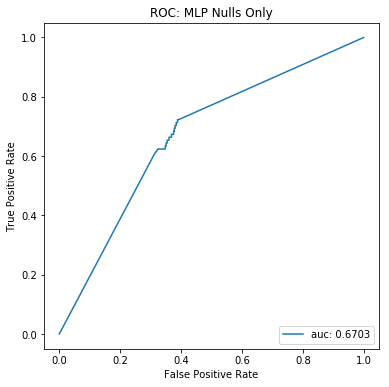

In [194]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_nullsonly, x_test=Xtest_nullsonly,
        y_test=Ytest_nullsonly,title="ROC: MLP Nulls Only")

### MLP Model One Hot

### MLP Model One Hot, default learning rate in Stochastic Gradient Descent Optimizer.
This is a comparison MLP model that uses the default learning rate of 0.01 to descend down the loss gradient in an attempt to find the global minimum (Reference 14).

In [195]:
# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
DEFAULT_stochastic = SGD()
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for One Hot.
mlp_onehot_DEFAULT = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=64,
                             second_dense=32,
                             third_dense=16,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_onehot)

In [196]:
# This compiles the MLP model for the One Hot data.
# This comes from Reference 13 in References.
mlp_onehot_DEFAULT.compile(loss='binary_crossentropy',
              optimizer= DEFAULT_stochastic,
              metrics=['accuracy'])

In [197]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_onehot_DEFAULT.hdf5',
                             verbose=1, save_best_only=True)

In [198]:
# This fits the model and runs it for 100 epochs.
mlp_onehot_DEFAULT.fit(Xtrain_onehot, Ytrain_onehot, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 52409 samples, validate on 13103 samples
Epoch 1/75
52409/52409 [==============================] - 7s 126us/step - loss: 0.7457 - acc: 0.6983 - val_loss: 0.5843 - val_acc: 0.8394

Epoch 00001: val_loss improved from inf to 0.58428, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 2/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.6212 - acc: 0.7979 - val_loss: 0.5187 - val_acc: 0.8484

Epoch 00002: val_loss improved from 0.58428 to 0.51874, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 3/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.5730 - acc: 0.8217 - val_loss: 0.4967 - val_acc: 0.8544

Epoch 00003: val_loss improved from 0.51874 to 0.49673, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 4/75
52409/52409 [==============================] - 4s 79us/step - loss: 0.5448 - acc: 0.8315 - val_loss: 0.4767 - val_acc: 0.8575

Epoch 00004: val_loss improved from

52409/52409 [==============================] - 4s 85us/step - loss: 0.3802 - acc: 0.8603 - val_loss: 0.3491 - val_acc: 0.8720

Epoch 00034: val_loss improved from 0.35125 to 0.34908, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 35/75
52409/52409 [==============================] - 4s 86us/step - loss: 0.3786 - acc: 0.8607 - val_loss: 0.3451 - val_acc: 0.8737

Epoch 00035: val_loss improved from 0.34908 to 0.34509, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 36/75
52409/52409 [==============================] - 5s 88us/step - loss: 0.3786 - acc: 0.8610 - val_loss: 0.3426 - val_acc: 0.8753

Epoch 00036: val_loss improved from 0.34509 to 0.34264, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 37/75
52409/52409 [==============================] - 5s 92us/step - loss: 0.3740 - acc: 0.8615 - val_loss: 0.3440 - val_acc: 0.8731

Epoch 00037: val_loss did not improve from 0.34264
Epoch 38/75
52409/52409 [==============

52409/52409 [==============================] - 5s 87us/step - loss: 0.3473 - acc: 0.8643 - val_loss: 0.3224 - val_acc: 0.8726

Epoch 00071: val_loss did not improve from 0.31832
Epoch 72/75
52409/52409 [==============================] - 5s 88us/step - loss: 0.3465 - acc: 0.8651 - val_loss: 0.3174 - val_acc: 0.8763

Epoch 00072: val_loss improved from 0.31832 to 0.31741, saving model to saved_models/weights.best.mlp_onehot_DEFAULT.hdf5
Epoch 73/75
52409/52409 [==============================] - 5s 90us/step - loss: 0.3463 - acc: 0.8646 - val_loss: 0.3185 - val_acc: 0.8755

Epoch 00073: val_loss did not improve from 0.31741
Epoch 74/75
52409/52409 [==============================] - 5s 94us/step - loss: 0.3466 - acc: 0.8644 - val_loss: 0.3198 - val_acc: 0.8758

Epoch 00074: val_loss did not improve from 0.31741
Epoch 75/75
52409/52409 [==============================] - 5s 88us/step - loss: 0.3459 - acc: 0.8645 - val_loss: 0.3141 - val_acc: 0.8779

Epoch 00075: val_loss improved from 0.3174

In [199]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_onehot_DEFAULT.load_weights('saved_models/weights.best.mlp_onehot_DEFAULT.hdf5')

In [200]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_onehot_DEFAULT.evaluate(Xtest_onehot, Ytest_onehot, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 96.3272%


In [201]:
# This prints the AUC score for the model.
Ypred_onehot_DEFAULT = mlp_onehot_DEFAULT.predict(Xtest_onehot)
ROC_mlp_onehot_DEFAULT = roc_auc_score(Ytest_onehot, Ypred_onehot_DEFAULT)
print("The AUC score for the model is %.4f." % ROC_mlp_onehot_DEFAULT)

The AUC score for the model is 0.4917.


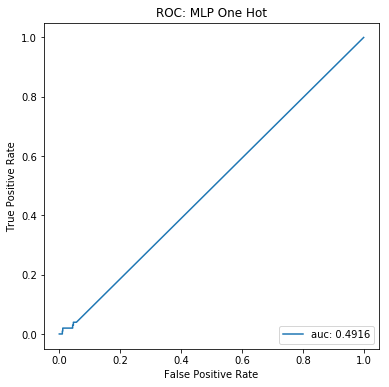

In [202]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_onehot_DEFAULT, x_test=Xtest_onehot,
        y_test=Ytest_onehot,title="ROC: MLP One Hot")

### MLP Model One Hot Final

In [203]:
# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for One Hot.
mlp_onehot = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=64,
                             second_dense=32,
                             third_dense=16,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_onehot)

In [204]:
# This compiles the MLP model for the One Hot data.
# This comes from Reference 13 in References.
mlp_onehot.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [205]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_onehot.hdf5',
                             verbose=1, save_best_only=True)

In [206]:
# This fits the model and runs it for 100 epochs.
mlp_onehot.fit(Xtrain_onehot, Ytrain_onehot, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 52409 samples, validate on 13103 samples
Epoch 1/75
52409/52409 [==============================] - 7s 128us/step - loss: 0.8980 - acc: 0.5074 - val_loss: 0.7918 - val_acc: 0.7289

Epoch 00001: val_loss improved from inf to 0.79181, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 2/75
52409/52409 [==============================] - 4s 79us/step - loss: 0.8239 - acc: 0.6052 - val_loss: 0.7734 - val_acc: 0.6786

Epoch 00002: val_loss improved from 0.79181 to 0.77342, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 3/75
52409/52409 [==============================] - 4s 81us/step - loss: 0.8073 - acc: 0.6518 - val_loss: 0.7634 - val_acc: 0.6863

Epoch 00003: val_loss improved from 0.77342 to 0.76344, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 4/75
52409/52409 [==============================] - 4s 79us/step - loss: 0.7913 - acc: 0.6760 - val_loss: 0.7548 - val_acc: 0.6921

Epoch 00004: val_loss improved from 0.76344 to 0.75482, sav

52409/52409 [==============================] - 5s 87us/step - loss: 0.6046 - acc: 0.8044 - val_loss: 0.5278 - val_acc: 0.8264

Epoch 00033: val_loss improved from 0.53094 to 0.52776, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 34/75
52409/52409 [==============================] - 5s 87us/step - loss: 0.5964 - acc: 0.8044 - val_loss: 0.5233 - val_acc: 0.8335

Epoch 00034: val_loss improved from 0.52776 to 0.52325, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 35/75
52409/52409 [==============================] - 5s 87us/step - loss: 0.5942 - acc: 0.8079 - val_loss: 0.5202 - val_acc: 0.8416

Epoch 00035: val_loss improved from 0.52325 to 0.52024, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 36/75
52409/52409 [==============================] - 5s 91us/step - loss: 0.5910 - acc: 0.8077 - val_loss: 0.5173 - val_acc: 0.8461

Epoch 00036: val_loss improved from 0.52024 to 0.51732, saving model to saved_models/weights.best.mlp_onehot.hdf5



Epoch 00065: val_loss improved from 0.45910 to 0.45806, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 66/75
52409/52409 [==============================] - 5s 87us/step - loss: 0.5304 - acc: 0.8329 - val_loss: 0.4585 - val_acc: 0.8540

Epoch 00066: val_loss did not improve from 0.45806
Epoch 67/75
52409/52409 [==============================] - 5s 86us/step - loss: 0.5279 - acc: 0.8339 - val_loss: 0.4558 - val_acc: 0.8545

Epoch 00067: val_loss improved from 0.45806 to 0.45576, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 68/75
52409/52409 [==============================] - 5s 93us/step - loss: 0.5263 - acc: 0.8344 - val_loss: 0.4550 - val_acc: 0.8548

Epoch 00068: val_loss improved from 0.45576 to 0.45498, saving model to saved_models/weights.best.mlp_onehot.hdf5
Epoch 69/75
52409/52409 [==============================] - 5s 89us/step - loss: 0.5222 - acc: 0.8339 - val_loss: 0.4547 - val_acc: 0.8551

Epoch 00069: val_loss improved from 0.45498 to 0.4

In [207]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_onehot.load_weights('saved_models/weights.best.mlp_onehot.hdf5')

In [208]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_onehot.evaluate(Xtest_onehot, Ytest_onehot, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 65.0083%


In [209]:
# This prints the AUC score for the model.
Ypred_onehot = mlp_onehot.predict(Xtest_onehot)
ROC_mlp_onehot = roc_auc_score(Ytest_onehot, Ypred_onehot)
print("The AUC score for the model is %.4f." % ROC_mlp_onehot)

The AUC score for the model is 0.6327.


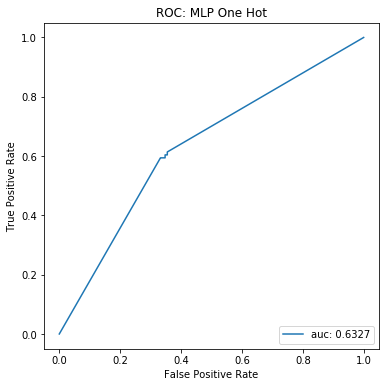

In [210]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_onehot, x_test=Xtest_onehot,
        y_test=Ytest_onehot,title="ROC: MLP One Hot")

### MLP Model Sum

### MLP Model Sum, default learning rate in Stochastic Gradient Descent Optimizer.
This is a comparison MLP model that uses the default learning rate of 0.01 to descend down the loss gradient in an attempt to find the global minimum (Reference 14).

In [211]:
# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
DEFAULT_stochastic = SGD()
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for SUM.
mlp_sum_DEFAULT = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_sum)

In [212]:
# This compiles the MLP model for the SUM data.
# This comes from Reference 13 in References.
mlp_sum_DEFAULT.compile(loss='binary_crossentropy',
              optimizer= DEFAULT_stochastic,
              metrics=['accuracy'])

In [213]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_sum_DEFAULT.hdf5',
                             verbose=1, save_best_only=True)

In [214]:
# This fits the model and runs it for 100 epochs.
mlp_sum_DEFAULT.fit(Xtrain_sum, Ytrain_sum, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 52409 samples, validate on 13103 samples
Epoch 1/75
52409/52409 [==============================] - 6s 121us/step - loss: 0.7281 - acc: 0.6402 - val_loss: 0.6886 - val_acc: 0.6879

Epoch 00001: val_loss improved from inf to 0.68862, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 2/75
52409/52409 [==============================] - 4s 73us/step - loss: 0.7072 - acc: 0.6610 - val_loss: 0.6716 - val_acc: 0.6881

Epoch 00002: val_loss improved from 0.68862 to 0.67157, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 3/75
52409/52409 [==============================] - 4s 74us/step - loss: 0.6987 - acc: 0.6645 - val_loss: 0.6682 - val_acc: 0.6883

Epoch 00003: val_loss improved from 0.67157 to 0.66816, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 4/75
52409/52409 [==============================] - 4s 73us/step - loss: 0.6912 - acc: 0.6681 - val_loss: 0.6613 - val_acc: 0.6884

Epoch 00004: val_loss improved from 0.66816 

52409/52409 [==============================] - 4s 81us/step - loss: 0.5947 - acc: 0.7258 - val_loss: 0.5439 - val_acc: 0.7646

Epoch 00033: val_loss improved from 0.54622 to 0.54388, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 34/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.5931 - acc: 0.7258 - val_loss: 0.5403 - val_acc: 0.7725

Epoch 00034: val_loss improved from 0.54388 to 0.54035, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 35/75
52409/52409 [==============================] - 4s 80us/step - loss: 0.5871 - acc: 0.7295 - val_loss: 0.5445 - val_acc: 0.7651

Epoch 00035: val_loss did not improve from 0.54035
Epoch 36/75
52409/52409 [==============================] - 4s 85us/step - loss: 0.5858 - acc: 0.7283 - val_loss: 0.5363 - val_acc: 0.7696

Epoch 00036: val_loss improved from 0.54035 to 0.53630, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 37/75
52409/52409 [=======================

52409/52409 [==============================] - 5s 86us/step - loss: 0.5579 - acc: 0.7489 - val_loss: 0.5045 - val_acc: 0.7994

Epoch 00070: val_loss did not improve from 0.50397
Epoch 71/75
52409/52409 [==============================] - 4s 84us/step - loss: 0.5607 - acc: 0.7468 - val_loss: 0.5039 - val_acc: 0.7968

Epoch 00071: val_loss improved from 0.50397 to 0.50391, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 72/75
52409/52409 [==============================] - 4s 83us/step - loss: 0.5594 - acc: 0.7494 - val_loss: 0.5006 - val_acc: 0.8013

Epoch 00072: val_loss improved from 0.50391 to 0.50061, saving model to saved_models/weights.best.mlp_sum_DEFAULT.hdf5
Epoch 73/75
52409/52409 [==============================] - 4s 83us/step - loss: 0.5589 - acc: 0.7502 - val_loss: 0.5009 - val_acc: 0.8017

Epoch 00073: val_loss did not improve from 0.50061
Epoch 74/75
52409/52409 [==============================] - 4s 84us/step - loss: 0.5582 - acc: 0.7507 - val_loss: 0.5

In [215]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_sum_DEFAULT.load_weights('saved_models/weights.best.mlp_sum_DEFAULT.hdf5')

In [216]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_sum_DEFAULT.evaluate(Xtest_sum, Ytest_sum, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 96.2270%


In [232]:
# This prints the AUC score for the model.
Ypred_sum_DEFAULT = mlp_sum_DEFAULT.predict(Xtest_sum)
ROC_mlp_sum_DEFAULT = roc_auc_score(Ytest_sum, Ypred_sum_DEFAULT)
print("The AUC score for the model is %.4f." % ROC_mlp_sum_DEFAULT)

The AUC score for the model is 0.5069.


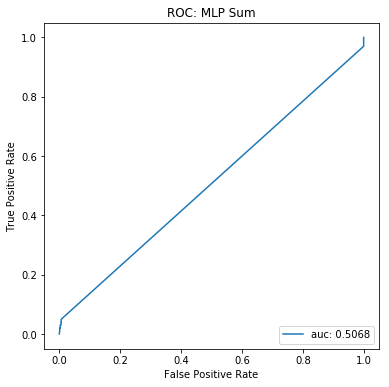

In [233]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_sum_DEFAULT, x_test=Xtest_sum,
        y_test=Ytest_sum,title="ROC: MLP Sum")

### MLP Model Sum Final

In [219]:
# This comes from Reference 7 in References.
n_epochs = 75
size_of_batch = 50
stochastic = SGD(lr=0.001)
nad = Nadam()
RMS = RMSprop()

# This builds the MLP model for SUM.
mlp_sum = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                             first_dense=32,
                             second_dense=16,
                             third_dense=8,
                            hidden_act='relu',
                            out_act='sigmoid',
                            x=Xtrain_sum)

In [220]:
# This compiles the MLP model for the SUM data.
# This comes from Reference 13 in References.
mlp_sum.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [221]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 6 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.mlp_sum.hdf5',
                             verbose=1, save_best_only=True)

In [222]:
# This fits the model and runs it for 100 epochs.
mlp_sum.fit(Xtrain_sum, Ytrain_sum, validation_split=0.20,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = [checkpoint], verbose=1)

Train on 52409 samples, validate on 13103 samples
Epoch 1/75
52409/52409 [==============================] - 7s 126us/step - loss: 0.7861 - acc: 0.5324 - val_loss: 0.7148 - val_acc: 0.6870

Epoch 00001: val_loss improved from inf to 0.71479, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 2/75
52409/52409 [==============================] - 4s 78us/step - loss: 0.7509 - acc: 0.5894 - val_loss: 0.7008 - val_acc: 0.6901

Epoch 00002: val_loss improved from 0.71479 to 0.70081, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 3/75
52409/52409 [==============================] - 4s 78us/step - loss: 0.7430 - acc: 0.6119 - val_loss: 0.6925 - val_acc: 0.6917

Epoch 00003: val_loss improved from 0.70081 to 0.69254, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 4/75
52409/52409 [==============================] - 4s 75us/step - loss: 0.7393 - acc: 0.6187 - val_loss: 0.6872 - val_acc: 0.6921

Epoch 00004: val_loss improved from 0.69254 to 0.68725, saving model

52409/52409 [==============================] - 4s 81us/step - loss: 0.6882 - acc: 0.6628 - val_loss: 0.6464 - val_acc: 0.7062

Epoch 00034: val_loss improved from 0.64747 to 0.64638, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 35/75
52409/52409 [==============================] - 4s 81us/step - loss: 0.6900 - acc: 0.6660 - val_loss: 0.6455 - val_acc: 0.7060

Epoch 00035: val_loss improved from 0.64638 to 0.64554, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 36/75
52409/52409 [==============================] - 4s 81us/step - loss: 0.6871 - acc: 0.6647 - val_loss: 0.6442 - val_acc: 0.7069

Epoch 00036: val_loss improved from 0.64554 to 0.64425, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 37/75
52409/52409 [==============================] - 4s 81us/step - loss: 0.6855 - acc: 0.6644 - val_loss: 0.6429 - val_acc: 0.7087

Epoch 00037: val_loss improved from 0.64425 to 0.64293, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 38/75


52409/52409 [==============================] - 4s 85us/step - loss: 0.6592 - acc: 0.6894 - val_loss: 0.6076 - val_acc: 0.7457

Epoch 00067: val_loss improved from 0.60878 to 0.60764, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 68/75
52409/52409 [==============================] - 4s 84us/step - loss: 0.6567 - acc: 0.6906 - val_loss: 0.6069 - val_acc: 0.7460

Epoch 00068: val_loss improved from 0.60764 to 0.60694, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 69/75
52409/52409 [==============================] - 5s 87us/step - loss: 0.6555 - acc: 0.6916 - val_loss: 0.6060 - val_acc: 0.7459

Epoch 00069: val_loss improved from 0.60694 to 0.60598, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 70/75
52409/52409 [==============================] - 5s 93us/step - loss: 0.6540 - acc: 0.6926 - val_loss: 0.6049 - val_acc: 0.7471

Epoch 00070: val_loss improved from 0.60598 to 0.60489, saving model to saved_models/weights.best.mlp_sum.hdf5
Epoch 71/75


In [227]:
# This loads the best weights from the model.
# This comes from Reference 6 in References.
mlp_sum.load_weights('saved_models/weights.best.mlp_sum.hdf5')

In [228]:
# This prints the accuracy of the model.
# This comes from Reference 9 in References.
score = mlp_sum.evaluate(Xtest_sum, Ytest_sum, verbose=0)
accuracy = 100*score[1]
print('Test acuracy: %.4f%%' %accuracy)

Test acuracy: 74.7579%


In [231]:
# This prints the AUC score for the model.
Ypred_sum = mlp_sum.predict(Xtest_sum)
ROC_mlp_sum = roc_auc_score(Ytest_sum, Ypred_sum)
print("The AUC score for the model is %.4f." % ROC_mlp_sum)

The AUC score for the model is 0.6445.


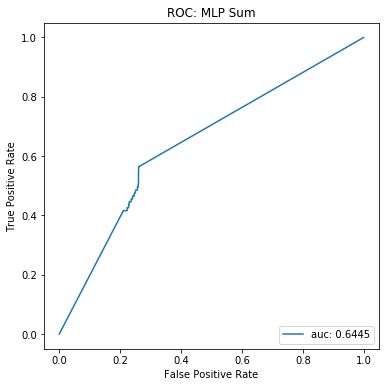

In [230]:
# This plots the ROC curve for the model.
roc_plot(model=mlp_sum, x_test=Xtest_sum,
        y_test=Ytest_sum,title="ROC: MLP Sum")

<a id='references'></a>
## References

1. https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html
3. https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9
4. https://dziganto.github.io/cross-validation/data%20science/machine%20learning/model%20tuning/python/Model-Tuning-with-Validation-and-Cross-Validation/
5. https://keras.io/getting-started/sequential-model-guide/
6. Udacity Machine Learning Engineer Nanodegree Program, Semester 2, Brian Campbell - Dog Breed Classifier Project
7. https://keras.io/getting-started/sequential-model-guide/
8. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html
9. https://keras.io/models/sequential/
10. https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
11. https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
12. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
13. https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory
14. https://keras.io/optimizers/